# Z-Test

- Introduction
- When to use Z-test
- How to use Z-test
- Setup / Import
- Sample task
- Data load
- Conclusion
- References / Acknowledgements

## Introduction

Z-test basically tells that how far data point is from mean. A Z-test is one of the type of hypothesis test. Hypothesis testing tells that wether the results are valid or not. For example, if someone said they had found a new drug that cures cancer, you would want to be sure it was probably true. A hypothesis test will tell you if it’s probably true, or probably not true. A Z test, is used when your data is approximately normally distributed. A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. 

Z-test tests the mean of a distribution in which we already know the population variance σ2 . Because of the central limit theorem, many test statistics are approximately normally distributed for large samples. For each significance level in the confidence interval, the Z-test has a single critical value (for example, 1.96 for 5% two tailed) which makes it more convenient than the Student's t-test which has separate and different critical values for each sample size (for different sample size, it would have different degree of freedom, which may determine the value of the critical values). Therefore, many statistical tests can be conveniently performed as approximate Z-tests if the sample size is large or the population variance is known. 

Z-score for one sample is calculated using the following formula

> # **z = (x – μ) / σ**






## When to use Z-test

Z-test is used if the following are fulfilled.
- Sample size is greater than 30. Otherwise, use a t test.
- Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
- Data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
- Data should be randomly selected from a population, where each item has an equal chance of being selected.
- Sample sizes should be equal if at all possible.

## How to use Z-test

Following steps are required for running a Z-test
- State the null hypothesis and alternate hypothesis.
- Choose an alpha level.
- Find the critical value of z in a z table.
- Calculate the z test statistic.
- Compare the test statistic to the critical z value and decide if you should support or reject the null hypothesis.

## Setup / Import


In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pylab as pl
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data load

The data was scraped from WineEnthusiast during the week of June 15th, 2017. It includes the wine reviews.

In [0]:
path = '/content/sample_data/winedata.csv'
wine_data = pd.read_csv(path)

In [0]:
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,#NAME?,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,#NAME?,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Checking if data is normally distributed


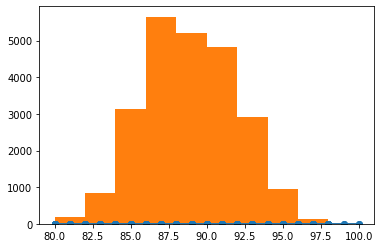

In [0]:
data_points = sorted(wine_data['points'])
fit = stats.norm.pdf(data_points, np.mean(data_points), np.std(data_points))  #this is a fitting indeed

pl.plot(data_points,fit,'-o')

pl.hist(data_points)      #use this to draw histogram of your data

pl.show() 

The graph shows that the data is normally distributed as the curve forms the bell shape.

## Sample task
 
A sample of N=30 wine point scores yields a sample mean of $\bar{X}$ = 89.2. Is this sample from the WineEnthusiast population? 



## Solution steps

To test this question we will use one-sample z-test. We will follow the following steps

- STEP 1 --- First we state the null hypothesis and alternative hypothesis like this;

> - H0: The sample is from the WineEnthusiast population, $\bar{X}$ = μ.
- HA: The sample is not from the WineEnthusiast population, $\bar{X}$ $\neq$ μ.





In [0]:
H0 = "The sample is from the WineEnthusiast population, x̅ = μ"
H1 = "The sample is not from the WineEnthusiast population, x̅ ≠ μ"

- STEP 2 --  Chose a significance (alpha) level
    Usually, statistical significance is associated with an alpha level of α = 0.05 or smaller. 
    




In [0]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test

- STEP 3 --- Find the critical value of z in a z table.
    We will use a z table to look up the critical z value that cooresponds to this α level. Here we are doing a two-tailed test because we don't care if the sample mean is greater than or less than the population mean. We just are testing to see if the two are equal or notl (see the alternative hypothesis above).

    **Following steps are used to find the critical value in z table**


> - Go to the row that represents the ones digit and the first digit after the decimal point (the tenths digit) of your z-value.
- Go to the column that represents the second digit after the decimal point (the hundredths digit) of your z-value.
- Intersect the row and column from Steps 1 and 2.
 

- STEP 4 --- Calculate the z test statistic.
    We will calculate the z-statitic for the sample mean compared to the population mean dividing by the standard deviation of the sample mean, which is the standard error σ/sqrt(N). 
 
 

In [0]:
data_mean = data_points.mean()
data_sigma = data_points.std(ddof=0)
print("mean of data: ", data_mean, ", sigma of data:", data_sigma)

mean of data:  88.38651053470998 , sigma of data: 3.011099144749065


In [0]:
x_bar = 89.2
N = 30
SE = data_sigma/np.sqrt(N)
z_stat = (x_bar - data_mean)/SE
print(z_stat)

1.4797471255942025



- STEP 5 -- Compare the test statistic to the critical z value and decide if you should support or reject the null hypothesis. 
    If this z-statistic is less than z-critical then we accept the null hypothesis, otherwise we reject the null and accept the alternative hypothesis.

In [0]:
if z_stat < z_critical:
    print("Null hypothesis accepted:")
    print(H0)
else:
    print("Null hypothesis rejected:")
    print(H1)

Null hypothesis accepted:
The sample is from the WineEnthusiast population, x̅ = μ


## Calculating Z-test using Statsmodel

In [0]:
ztest ,pval = stests.ztest(data_points, x2=None, value=156)

if pval<0.05:
    print("Null hypothesis accepted:")
    print(H0)
else:
    print("Null hypothesis rejected:")
    print(H1)

Null hypothesis accepted:
The sample is from the WineEnthusiast population, x̅ = μ


## Conclusion

- Z-test is one of the type of hypothesis test used for normally distributed data
- Z-test is used for sample size greater than 30.
- Z-test is not used when data is not normally distributed.

## References / Acknowledgements

- https://en.wikipedia.org/wiki/Z-test
- https://www.kaggle.com/jgroff/unit-3-hypothesis-testing
- https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
